Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    dataframe = pd.read_csv(file)
    return dataframe

def exercise_1(df):
    column_names = list(df.columns)
    return column_names

def exercise_2(df, k):
    sample = df.head(k)
    return sample

def exercise_3(df, k):
    sample = df.sample(k)
    return sample

def exercise_4(df):
    unique = df.dtypes.unique()
    return unique

def exercise_5(df):
    transaction_counts = df.value_counts().head(10).reset_index(name='frequency')     
    return transaction_counts

def exercise_6(df):
    fraudulent = df[df['isFraud'] == 1]
    return fraudulent

def exercise_7(df):
    distinct = df.groupby('nameOrig')['nameDest'].nunique().reset_index(name='distinct_destinations')
    distinct = distinct.sort_values(by='distinct_destinations', ascending=False)
    return distinct

def visual_1(df):
    pass

def visual_2(df):
    pass

def exercise_custom(df):
    pass
    
def visual_custom(df):
    pass

In [38]:
df = exercise_0('./transactions.csv')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [41]:
# Test exercises here
distinct = exercise_7(df)
distinct

,nameOrig,distinct_destinations
122825,C260230637,2
142013,C44568807,2
73007,C1709295811,2
173368,C745009740,2
133325,C361604284,1
...,...,...
66669,C1648216508,1
66670,C1648222711,1
66671,C1648228342,1
66672,C1648232591,1


Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

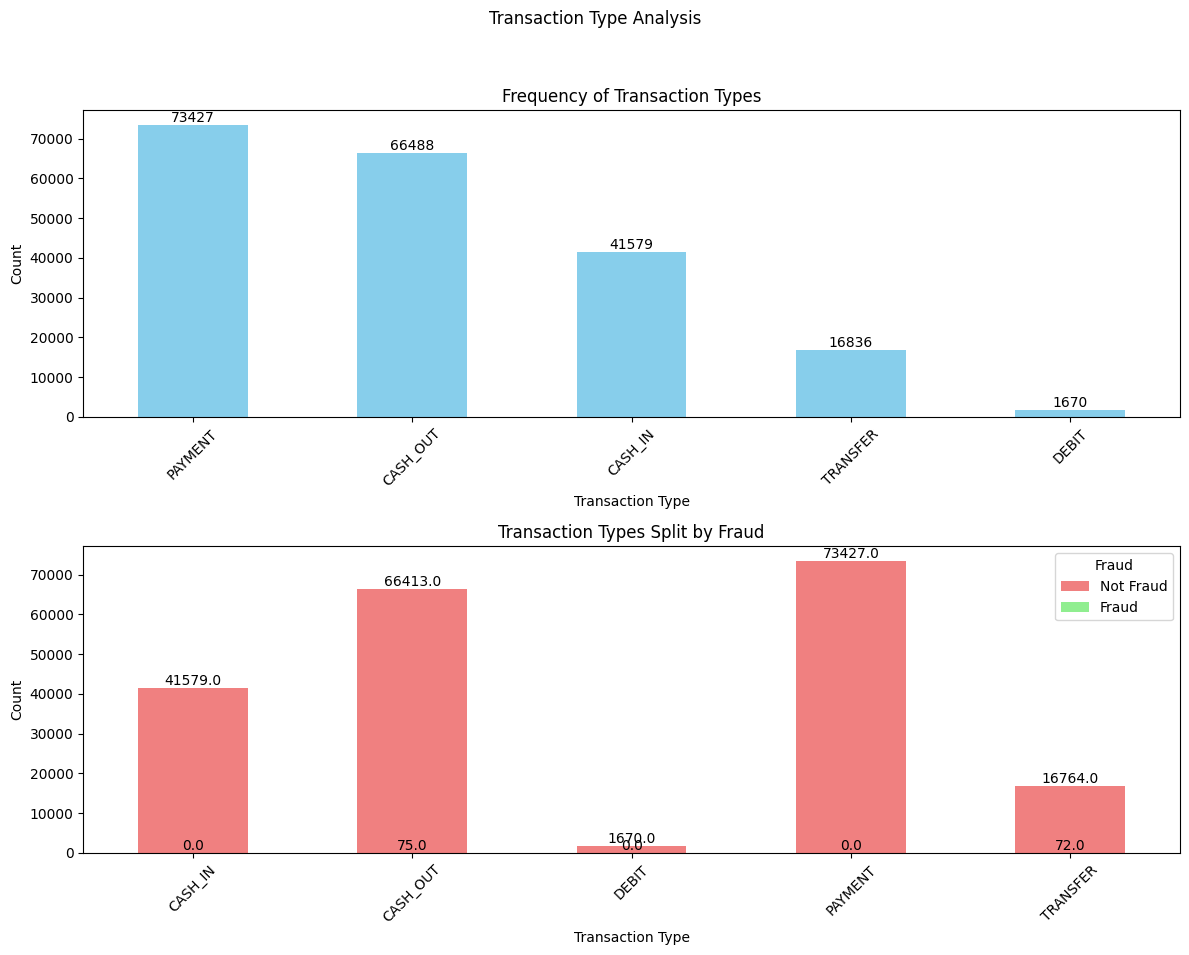

In [42]:
def visual_1(df):
    def transaction_counts(ax):
        df['type'].value_counts().plot(kind='bar', color='skyblue', ax=ax)
        ax.set_title('Frequency of Transaction Types')
        ax.set_xlabel('Transaction Type')
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    def transaction_counts_split_by_fraud(ax):
        df.groupby(['type', 'isFraud']).size().unstack().plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], ax=ax)
        ax.set_title('Transaction Types Split by Fraud')
        ax.set_xlabel('Transaction Type')
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title='Fraud', labels=['Not Fraud', 'Fraud'])
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    fig, axs = plt.subplots(2, figsize=(12, 10))
    transaction_counts(axs[0])
    transaction_counts_split_by_fraud(axs[1])
    
    fig.suptitle('Transaction Type Analysis')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

visual_1(df)


<Figure size 1000x600 with 0 Axes>

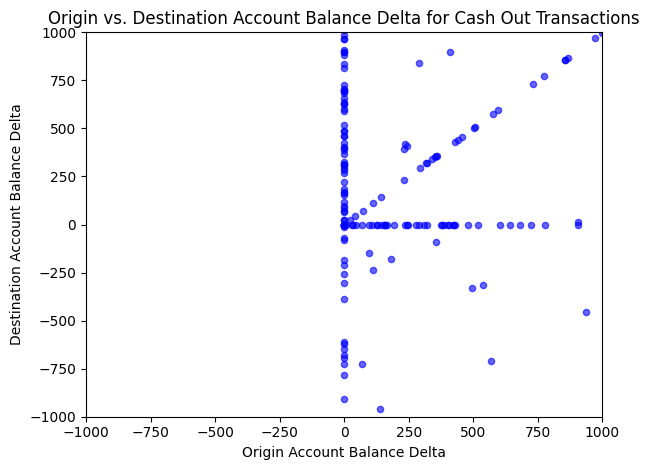

In [44]:
def visual_2(df):
    def query(df):
        # Filtrar para transações 'CASH_OUT'
        cash_out_df = df[df['type'] == 'CASH_OUT'].copy()
        # Calcular as diferenças de saldo
        cash_out_df['deltaOrig'] = cash_out_df['oldbalanceOrg'] - cash_out_df['newbalanceOrig']
        cash_out_df['deltaDest'] = cash_out_df['newbalanceDest'] - cash_out_df['oldbalanceDest']
        return cash_out_df[['deltaOrig', 'deltaDest']]
    
    # Gerar o DataFrame filtrado e calculado
    plot_data = query(df)
    
    # Plotar o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    plot_data.plot.scatter(x='deltaOrig', y='deltaDest', alpha=0.6, color='blue')
    plt.title('Origin vs. Destination Account Balance Delta for Cash Out Transactions')
    plt.xlabel('Origin Account Balance Delta')
    plt.ylabel('Destination Account Balance Delta')
    plt.xlim(left=-1e3, right=1e3)
    plt.ylim(bottom=-1e3, top=1e3)
    plt.tight_layout()
    plt.show()

visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

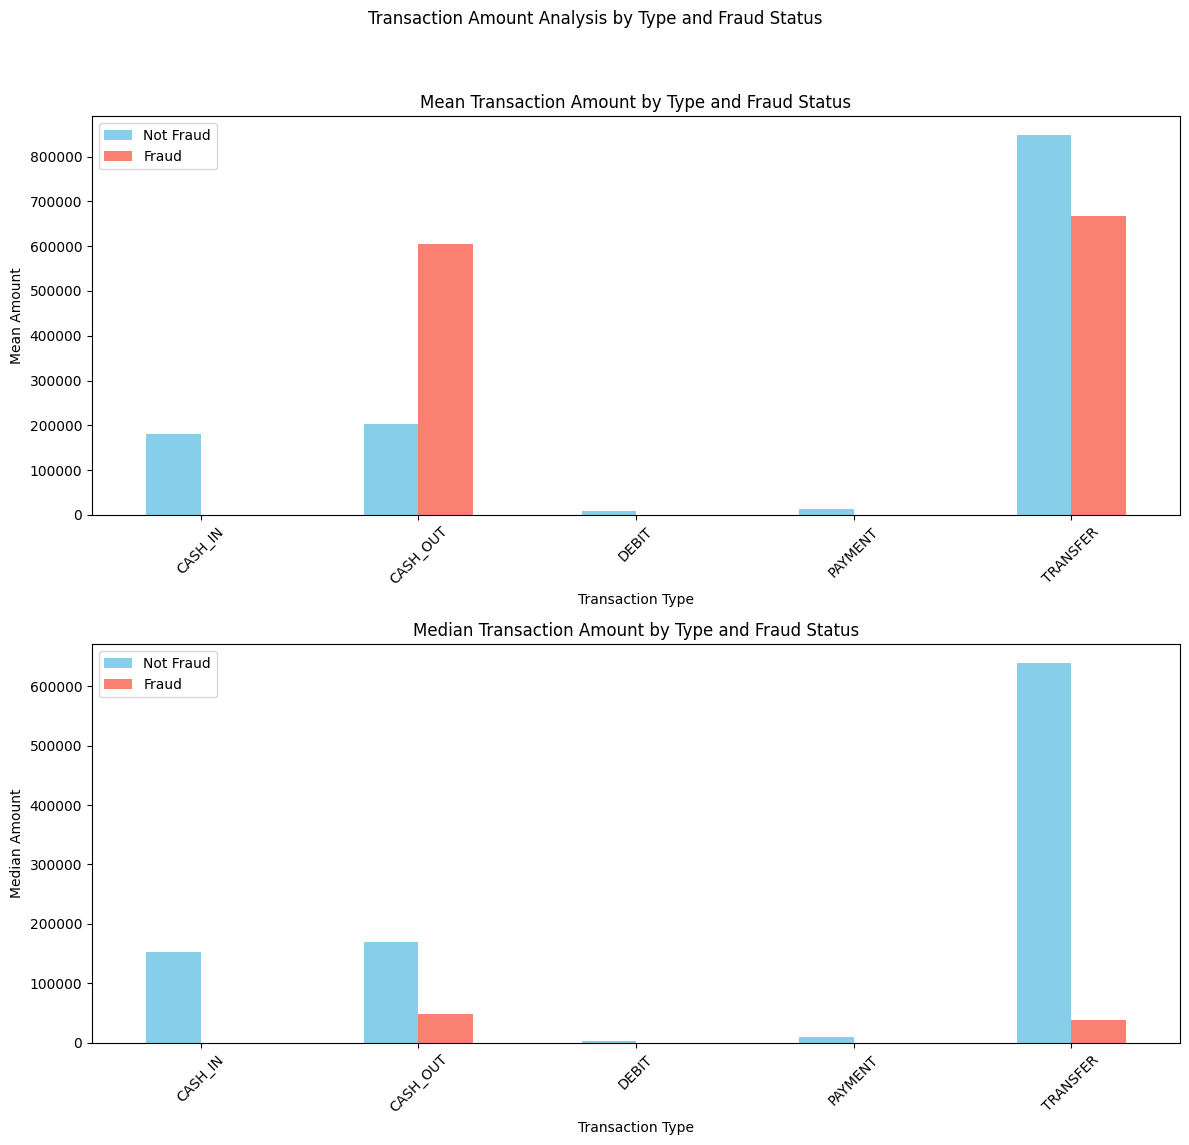

In [46]:
def exercise_custom(df):
    grouped = df.groupby(['type', 'isFraud'])['amount'].agg(['mean', 'median']).unstack()
    return grouped
    
def visual_custom(df):
    grouped = exercise_custom(df)

    fig, axs = plt.subplots(2, figsize=(12, 12))

    grouped['mean'].plot(kind='bar', ax=axs[0], color=['skyblue', 'salmon'])
    axs[0].set_title('Mean Transaction Amount by Type and Fraud Status')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Mean Amount')
    axs[0].legend(['Not Fraud', 'Fraud'])
    axs[0].tick_params(axis='x', rotation=45)

    grouped['median'].plot(kind='bar', ax=axs[1], color=['skyblue', 'salmon'])
    axs[1].set_title('Median Transaction Amount by Type and Fraud Status')
    axs[1].set_xlabel('Transaction Type')
    axs[1].set_ylabel('Median Amount')
    axs[1].legend(['Not Fraud', 'Fraud'])
    axs[1].tick_params(axis='x', rotation=45)

    fig.suptitle('Transaction Amount Analysis by Type and Fraud Status')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

visual_custom(df)

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.